In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

## Basic operations

In [43]:
df=pd.read_csv('sample.csv',delimiter=',')
display(df)
display(df.head())
display(df.tail(5))
display(df.info())

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320


,animal,uniq_id,water_need
17,lion,1018,500
18,lion,1019,390
19,kangaroo,1020,410
20,kangaroo,1021,430
21,kangaroo,1022,410


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
animal        22 non-null object
uniq_id       22 non-null int64
water_need    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


None

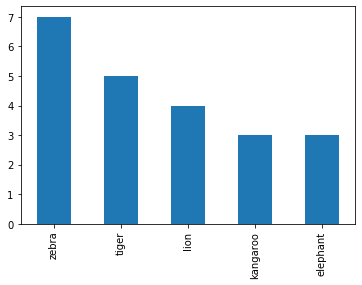

In [44]:
# count of animals
df['animal'].value_counts().plot(kind="bar")

In [45]:
# print columns and index
display('columns',df.columns)
display('index',df.index)
display('animal column',df['animal']) # print column animal
display('animal and water need columns',df[['animal','water_need']]) # print two columns
# unique animals
display('unique animals',df['animal'].unique())
# delete column
df.drop(['uniq_id'],inplace=True,axis=1)
display('after uniq_id column delete',df.head())

'columns'

Index(['animal', 'uniq_id', 'water_need'], dtype='object')

'index'

RangeIndex(start=0, stop=22, step=1)

'animal column'

0     elephant
1     elephant
2     elephant
3        tiger
4        tiger
5        tiger
6        tiger
7        tiger
8        zebra
9        zebra
10       zebra
11       zebra
12       zebra
13       zebra
14       zebra
15        lion
16        lion
17        lion
18        lion
19    kangaroo
20    kangaroo
21    kangaroo
Name: animal, dtype: object

'animal and water need columns'

,animal,water_need
0,elephant,500
1,elephant,600
2,elephant,550
3,tiger,300
4,tiger,320
5,tiger,330
6,tiger,290
7,tiger,310
8,zebra,200
9,zebra,220


'unique animals'

array(['elephant', 'tiger', 'zebra', 'lion', 'kangaroo'], dtype=object)

'after uniq_id column delete'

,animal,water_need
0,elephant,500
1,elephant,600
2,elephant,550
3,tiger,300
4,tiger,320


In [47]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'gender': ['male', 'female', 'male', 'female', 'female'],
           'salary':np.random.randint(low=100,high=1000,size=(5))}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'gender','salary'])
df

,first_name,last_name,gender,salary
0,Jason,Miller,male,338
1,Molly,Jacobson,female,484
2,Tina,Ali,male,392
3,Jake,Milner,female,468
4,Amy,Cooze,female,394


# apply operations over dataframe cells

In [48]:
df['first_name']=df['first_name'].apply(lambda x : x.upper())
# quiz : modify df to contain a new column called "full_name"
df

,first_name,last_name,gender,salary
0,JASON,Miller,male,338
1,MOLLY,Jacobson,female,484
2,TINA,Ali,male,392
3,JAKE,Milner,female,468
4,AMY,Cooze,female,394


In [21]:
# apply custom function
def good_bad(salary):
    return 'good' if salary >=500 else 'bad'
df['good/bad']=df['salary'].apply(good_bad)
df
# quiz modify quiz to check if digits sum is even or odd

,first_name,last_name,gender,salary,good/bad
0,JASON,Miller,male,444,bad
1,MOLLY,Jacobson,female,720,good
2,TINA,Ali,male,301,bad
3,JAKE,Milner,female,660,good
4,AMY,Cooze,female,796,good


# Convert A Categorical Variable Into Dummy Variables

In [17]:
# Create a dataframe
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'gender': ['male', 'female', 'male', 'female', 'female']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'gender'])
df

,first_name,last_name,gender
0,Jason,Miller,male
1,Molly,Jacobson,female
2,Tina,Ali,male
3,Jake,Milner,female
4,Amy,Cooze,female


In [20]:
# Create a set of dummy variables from the sex variable
df_gender = pd.get_dummies(df['gender'])

In [21]:
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_gender], axis=1)
df_new

,first_name,last_name,gender,female,male
0,Jason,Miller,male,0,1
1,Molly,Jacobson,female,1,0
2,Tina,Ali,male,0,1
3,Jake,Milner,female,1,0
4,Amy,Cooze,female,1,0


# Join And Merge Pandas Dataframe

In [22]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [23]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [24]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [25]:
#Join the two dataframes along rows
df_new = pd.concat([df_a, df_b])
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [26]:
#Join the two dataframes along columns
pd.concat([df_a, df_b], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [28]:
# merge two dfs to get intersection using inner join
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


# filter rows by specefic conditions

In [45]:
dict_data={'a':np.random.randint(low=2, high=20,size=10),
            'b':np.random.randint(low=2, high=20,size=10)
          }
df = pd.DataFrame(dict_data)
df

,a,b
0,16,10
1,13,9
2,4,7
3,4,14
4,3,4
5,5,7
6,15,12
7,18,17
8,11,10
9,18,3


In [48]:
df.query('a > b and a-b in [1,2,3]') # optimized than traditional filtering

,a,b
6,15,12
7,18,17
8,11,10


# handle Missing Values

In [3]:
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,np.nan,0.8308,0.4962,0.3269,0.5346,np.nan]

# View the dataset
display(df)
df['x1']=df['x1'].fillna(df['x1'].mean())
display('after filling nans',df)
# we can also fill with median , min , max

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,NaN
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,NaN


'after filling nans'

,x0,x1
0,0.3051,0.471429
1,0.4949,0.265400
2,0.6974,0.261500
3,0.3769,0.584600
4,0.2231,0.471429
5,0.3410,0.830800
6,0.4436,0.496200
7,0.5897,0.326900
8,0.6308,0.534600
9,0.5000,0.471429


In [62]:
# forward and backfilling
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,np.nan,0.8308,0.4962,0.3269,0.746,np.nan]

# View the dataset
display(df)
df['x1']=df['x1'].fillna(method='ffill')
display('after filling nans',df)
# quiz read documentation and try another moethods

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,NaN
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.7460
9,0.5000,NaN


'after filling nans'

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.5846
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.7460
9,0.5000,0.7460


In [5]:
# we may handle nans by dropping
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,np.nan,0.8308,0.4962,0.3269,0.5346,np.nan]
display('original df',df)
df.dropna(inplace=True)
display('after removing nans',df)

'original df'

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,NaN
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,NaN


'after removing nans'

,x0,x1
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346


# Data Wrangling

### 1. Apply Functions By Group In Pandas

In [63]:
# Create an example dataframe
data = {'Platoon': ['A','A','A','A','A','A','B','B','B','B','B','C','C','C','C','C'],
       'Casualties': [1,4,5,7,5,5,6,1,4,5,6,7,4,6,4,6]}
df = pd.DataFrame(data)
df

,Platoon,Casualties
0,A,1
1,A,4
2,A,5
3,A,7
4,A,5
5,A,5
6,B,6
7,B,1
8,B,4
9,B,5


In [88]:
display('group by average',df.groupby('Platoon').mean())
# we can use also median , max , min
# group by custom function
def custom_f(col):
    return max(col)-min(col)
display('custom group',df.groupby('Platoon')['Casualties'].apply(custom_f))

'group by average'

,Casualties
Platoon,
A,4.5
B,4.4
C,5.4


'custom group'

Platoon
A    6
B    5
C    3
Name: Casualties, dtype: int64

## Crosstabs In pandas

In [89]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,experience,name,preTestScore,postTestScore
0,Nighthawks,infantry,veteran,Miller,4,25
1,Nighthawks,infantry,rookie,Jacobson,24,94
2,Nighthawks,cavalry,veteran,Ali,31,57
3,Nighthawks,cavalry,rookie,Milner,2,62
4,Dragoons,infantry,veteran,Cooze,3,70
5,Dragoons,infantry,rookie,Jacon,4,25
6,Dragoons,cavalry,veteran,Ryaner,24,94
7,Dragoons,cavalry,rookie,Sone,31,57
8,Scouts,infantry,veteran,Sloan,2,62
9,Scouts,infantry,rookie,Piger,3,70


In [91]:
pd.crosstab(df.regiment, df.company)

company,cavalry,infantry
regiment,,
Dragoons,2,2
Nighthawks,2,2
Scouts,2,2


## dealing with datetime

In [27]:
weatherdf=pd.read_csv('weather.csv')
weatherdf.head()

,Formatted Date,Temperature (C),Humidity
0,2006-04-10 00:00:00.000 +0200,10.422222,0.62
1,2006-04-10 01:00:00.000 +0200,9.911111,0.66
2,2006-04-10 02:00:00.000 +0200,11.183333,0.80
3,2006-04-10 03:00:00.000 +0200,7.155556,0.79
4,2006-04-10 04:00:00.000 +0200,6.111111,0.82


In [28]:
# we need to check date column type
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
Formatted Date     96 non-null object
Temperature (C)    96 non-null float64
Humidity           96 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


In [29]:
weatherdf['Formatted Date']=pd.to_datetime(weatherdf['Formatted Date'])
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
Formatted Date     96 non-null datetime64[ns, pytz.FixedOffset(120)]
Temperature (C)    96 non-null float64
Humidity           96 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(120)](1), float64(2)
memory usage: 2.4 KB


In [30]:
weatherdf.head()

,Formatted Date,Temperature (C),Humidity
0,2006-04-10 00:00:00+02:00,10.422222,0.62
1,2006-04-10 01:00:00+02:00,9.911111,0.66
2,2006-04-10 02:00:00+02:00,11.183333,0.80
3,2006-04-10 03:00:00+02:00,7.155556,0.79
4,2006-04-10 04:00:00+02:00,6.111111,0.82


In [31]:
# sometimes we need to make date is the dataframe index
weatherdf.set_index('Formatted Date',inplace=True)
weatherdf.head()

,Temperature (C),Humidity
Formatted Date,,
2006-04-10 00:00:00+02:00,10.422222,0.62
2006-04-10 01:00:00+02:00,9.911111,0.66
2006-04-10 02:00:00+02:00,11.183333,0.80
2006-04-10 03:00:00+02:00,7.155556,0.79
2006-04-10 04:00:00+02:00,6.111111,0.82


In [37]:
# making date as index will help us resample data
dailydf=weatherdf.resample('D').mean() # get average of every day temperature abd humedity
display(dailydf)

,Temperature (C),Humidity
Formatted Date,,
2006-04-10 00:00:00+02:00,14.181481,0.600000
2006-04-11 00:00:00+02:00,12.374537,0.832083
2006-04-12 00:00:00+02:00,8.370602,0.805000
2006-04-13 00:00:00+02:00,7.518287,0.736250


In [39]:
# we can also select data between range
dailydf['2006-04-10':'2006-04-12']

,Temperature (C),Humidity
Formatted Date,,
2006-04-10 00:00:00+02:00,14.181481,0.600000
2006-04-11 00:00:00+02:00,12.374537,0.832083
2006-04-12 00:00:00+02:00,8.370602,0.805000
